In [7]:
import sys
sys.path.append('/Users/pratikaher/SPRING23/Capstone/GNN_Architecture')

In [13]:
import torch
import dgl
from model import ConvModel

In [40]:
saved_model = torch.load('/Users/pratikaher/SPRING23/Capstone/GNN_Architecture/graph_files_latest_run/trained_model.pth')

In [41]:
graphs, _ = dgl.load_graphs("/Users/pratikaher/SPRING23/Capstone/GNN_Architecture/graph_files_latest_run/ecommerce_hetero_graph_subgraph.dgl")
ecommerce_hetero_graph_subgraph = graphs[0]

In [42]:

dim_dict = {'customer': ecommerce_hetero_graph_subgraph.nodes['customer'].data['features'].shape[1],
            'product': ecommerce_hetero_graph_subgraph.nodes['product'].data['features'].shape[1],
            'edge_dim': ecommerce_hetero_graph_subgraph.edges['orders'].data['features'].shape[1],
            'hidden_dim' : 128,
            'out_dim': 64
           }

In [43]:
mpnn_model = ConvModel(ecommerce_hetero_graph_subgraph, 3, dim_dict)
mpnn_model.load_state_dict(saved_model['model_state_dict'])
mpnn_model.eval()

ConvModel(
  (user_embed): NodeEmbedding(
    (proj_feats): Linear(in_features=27, out_features=128, bias=True)
  )
  (item_embed): NodeEmbedding(
    (proj_feats): Linear(in_features=3, out_features=128, bias=True)
  )
  (layers): ModuleList(
    (0): HeteroGraphConv(
      (mods): ModuleDict(
        (orders): ConvLayer(
          (dropout_fn): Dropout(p=0.0, inplace=False)
          (fc_self): Linear(in_features=128, out_features=128, bias=False)
          (fc_neigh): Linear(in_features=128, out_features=128, bias=False)
          (fc_preagg): Linear(in_features=128, out_features=128, bias=False)
          (edge_fc): Linear(in_features=2, out_features=16384, bias=True)
        )
        (rev-orders): ConvLayer(
          (dropout_fn): Dropout(p=0.0, inplace=False)
          (fc_self): Linear(in_features=128, out_features=128, bias=False)
          (fc_neigh): Linear(in_features=128, out_features=128, bias=False)
          (fc_preagg): Linear(in_features=128, out_features=128, bias=F

In [44]:
for name, param in mpnn_model.named_parameters():
    if param.requires_grad:
        print(name)

user_embed.proj_feats.weight
user_embed.proj_feats.bias
item_embed.proj_feats.weight
item_embed.proj_feats.bias
layers.0.mods.orders.fc_self.weight
layers.0.mods.orders.fc_neigh.weight
layers.0.mods.orders.fc_preagg.weight
layers.0.mods.orders.edge_fc.weight
layers.0.mods.orders.edge_fc.bias
layers.0.mods.rev-orders.fc_self.weight
layers.0.mods.rev-orders.fc_neigh.weight
layers.0.mods.rev-orders.fc_preagg.weight
layers.0.mods.rev-orders.edge_fc.weight
layers.0.mods.rev-orders.edge_fc.bias
layers.1.mods.orders.fc_self.weight
layers.1.mods.orders.fc_neigh.weight
layers.1.mods.orders.fc_preagg.weight
layers.1.mods.orders.edge_fc.weight
layers.1.mods.orders.edge_fc.bias
layers.1.mods.rev-orders.fc_self.weight
layers.1.mods.rev-orders.fc_neigh.weight
layers.1.mods.rev-orders.fc_preagg.weight
layers.1.mods.rev-orders.edge_fc.weight
layers.1.mods.rev-orders.edge_fc.bias


In [45]:
# weights = mpnn_model.layers[0].mods.orders.fc_neigh.weight.data

# # print(weights)

# plt.imshow(weights, cmap='gray', interpolation='nearest')
# plt.colorbar()
# plt.show()

In [46]:
import matplotlib.pyplot as plt

torch.Size([128, 27])


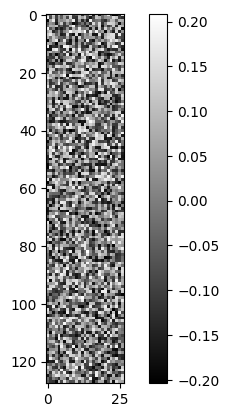

In [47]:
weights = mpnn_model.user_embed.proj_feats.weight.data

print(weights.shape)

plt.imshow(weights, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

torch.Size([128, 3])


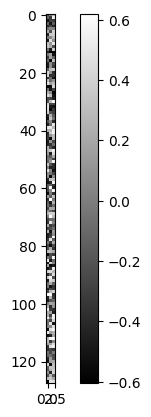

In [48]:
weights = mpnn_model.item_embed.proj_feats.weight.data

print(weights.shape)

plt.imshow(weights, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

tensor([[ 0.0690, -0.0502,  0.1437,  ..., -0.1989, -0.1196,  0.1820],
        [ 0.1826, -0.0803,  0.0989,  ...,  0.1138, -0.0953, -0.1277],
        [-0.1892,  0.0714,  0.1701,  ..., -0.0526,  0.0823,  0.0722],
        ...,
        [-0.1644, -0.0667,  0.0720,  ..., -0.1612, -0.0749,  0.1424],
        [-0.0307, -0.1166,  0.0033,  ...,  0.0407,  0.0518,  0.1564],
        [-0.0485, -0.1123, -0.1212,  ...,  0.1503,  0.0672,  0.0625]])


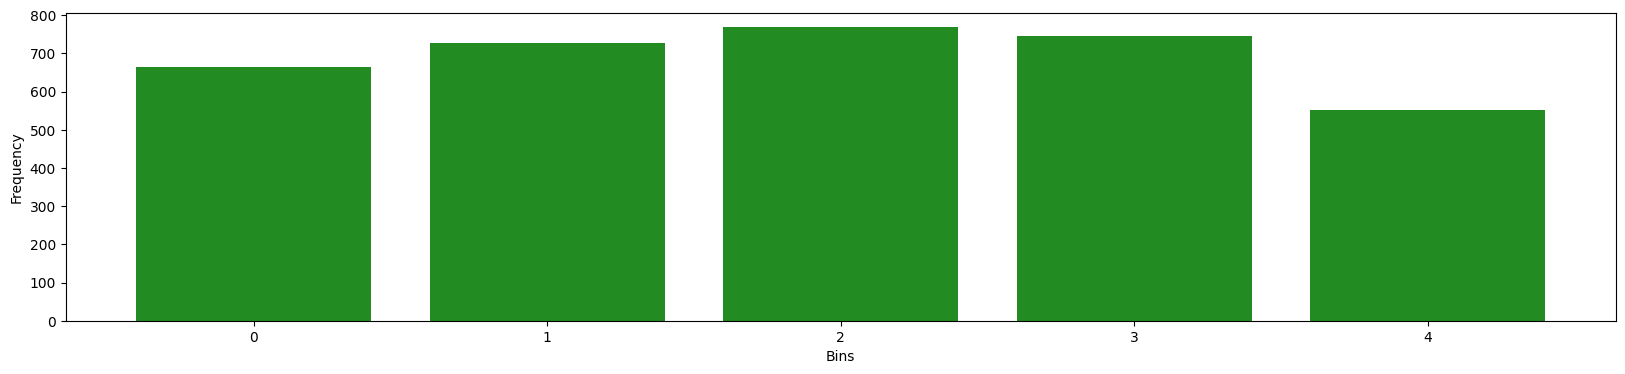

In [68]:
# visualize histograms
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for name, param in mpnn_model.named_parameters():
    if param.requires_grad and "proj_feats.weight" in name :
        t = param.data
        print(t)
        hist = torch.histc(t, bins=5)
        
        x = range(5)
        plt.bar(x, hist, align='center', color=['forestgreen'])
        plt.xlabel('Bins')
        plt.ylabel('Frequency')
        plt.show()
        
        break

        
        
#     plt.legend(legends)
#     plt.title('weights gradient distribution');